# Comparing Quantum vs Markov Random Walk Models of Judgements Mwasured by Rating Scale

**Authors: Z. Wang and J. Busemeyer**


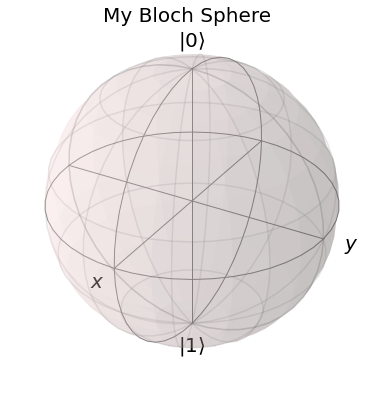

In [7]:


plot_bloch_vector([0,0,0,0,0,], title='My Bloch Sphere')


In [59]:
import numpy as np
import pandas as pd
from scipy.linalg import expm

import matplotlib.pyplot as plt
import seaborn as sns

from qiskit.visualization import plot_bloch_vector

sns.set()

## Overall Paper: AB Model

**Hypothesis:** The process of switching from a self's own perspective to another;s perspective requires a conginitive shift to imagine what the other person is thinking. This can lead to **incompatibility** of mental states, which generates order effects. A quantum model would be better to model this type of scenario than a classical model. This paper investigates the application of a quantum random walk vs a Markov random walk in rating the effectiveness of public service announcements (PSA) from two perspectives: the self perspective and the other perpective.

### Markov Random Walk

#### State Definition

For both models, it was assumed that judges are capable of using a very fine lattice with approximatelly 100 states. More specifically, we ser $n_k = 11$ evaluation states assigned to each rating scale value, and with $k=1,...,9$ rating scale values, this produces a total of $N=9.11=99$ evaluation states.  The first $n_1$ evaluations states are assigned to the first observed rating score equal to R=1, then next $n_2$ states are assigned the next observed rating score equal to R=2, and so on. For a 9-point rating scale, the last $n_9$ states are assigned the observed rating score to R=9.

<img src="./images/state_representation.png" width="500" />

In [2]:
# defining initial_state
def initial_state( rating, dims, base ):
    E0 = np.zeros(dims)

    rating_inter = [rating*base - base+1, rating*base]
    
    # in python, indexes start in zero, so we need to adjust the interval
    N =  rating_inter[1] - (rating_inter[0]-1)
    E0[rating_inter[0]-1:rating_inter[1]] = 1/N

    return E0

#### Markov Intensity Matrix

The intensity matrix $K[ij]$ is a tridiagonal matrix with entries $k_{i-1,j} = α$ in the upper diagonal and $k_{i+1,j} = β$ in the lower diagonal and $k_{ii} = -(α + β)$ on the diagonal. 

$$ K_{self} =  \begin{bmatrix} -(α_{self} + β_{self}) & α_{self}        & 0 & 0 & 0 \\
                               β        & -(α_{self} + β_{self}) & α_{self} & 0 & 0 \\
                               0        & β_{self}       & -(α_{self} + β_{self}) & α_{self} & 0 \\
                               0        & 0 & β_{self} & -(α_{self} + β_{self}) & α_{self} \\
                               0        & 0 & 0 & β_{self} & -(α_{self} + β_{self}) \\

\end{bmatrix}  $$


The same applies for the perspective for the other:
$$ K_{other} =  \begin{bmatrix} -(α_{other} + β_{other}) & α_{other}        & 0 & 0 & 0 \\
                               β        & -(α_{other} + β_{other}) & α_{other} & 0 & 0 \\
                               0        & β_{other}       & -(α_{other} + β_{other}) & α_{other} & 0 \\
                               0        & 0 & β_{other} & -(α_{other} + β_{other}) & α_{other} \\
                               0        & 0 & 0 & β_{other} & -(α_{other} + β_{other}) \\

\end{bmatrix}  $$


In [1]:
# defining the intensity matrix

# defining the intensity matrix
def intensity_mat( alpha, beta, dims ):
    k = np.zeros((dims, dims))
    
    # set diagonal to -(alpha + beta)
    np.fill_diagonal(k, -(alpha + beta))

    # set upper main diagonal to alpha
    m_alpha = np.diag(np.ones(dims-1)*alpha, 1)
    # set lower main diagonal to beta
    m_beta = np.diag(np.ones(dims-1)*beta, -1)

    return k + m_alpha + m_beta

#### Transition Matrix

The Markov random walk updates the probabilities of an initial vector E using a transition matrix T that evolves through time *t*. It is defined in the following way:

$$ Pr_{self} = e^{t K_s} ~~~~ Pr_{other} = e^{t K_o} $$

where $K_s$ and $K_o$ represent the intensity matrices. The intensity matrix describes how the evoltion of the process is conducted. The authors defined an intensity matrix for both the *self* and the *other* perspectives of the participants.,

In [136]:
# defining the transition matrix
def transition_matrix( alpha, beta, t, dims ):
    K = intensity_mat( alpha, beta, dims )
    T = expm( t*K)
    return T

#### Defining Projectors

In [3]:
# defining projectors based on ratings
def projection_mat( rating, dims, base ):
    M = np.zeros((Ndim, Ndim))

    rating_inter = [rating*base - base+1, rating*base]
    
    diag_vec = np.zeros(dims)
    # in python, indexes start in zero, so we need to adjust the interval
    diag_vec[rating_inter[0]-1:rating_inter[1]] = 1
    np.fill_diagonal(M, diag_vec)

    return M

#### Calculating Joint Probability: Question about Self then about Other

In [ ]:
def run_projections(Ndim, base, alpha_s, alpha_o, beta_s, beta_o, t, rating_s, rating_o, order):
    rating_init = int( np.floor(base/2) )

    E0 = initial_state( rating_init, Ndim, base)
    Ts = transition_matrix( alpha_s , beta_s, t, Ndim )
    To = transition_matrix( alpha_o , beta_o, t, Ndim )

    Ms = projection_mat( rating_s, Ndim, base )
    Mo = projection_mat( rating_o, Ndim, base )

    L = np.ones(Ndim)
    if order == 1:
        prob = np.matmul(L, np.matmul(Mo, np.matmul(To, np.matmul(Ms, np.matmul(Ts,E0)))))
    else:
        prob = np.matmul(L, np.matmul(Ms, np.matmul(Ts, np.matmul(Mo, np.matmul(To,E0)))))

    return prob

#### Running Experiments

In [ ]:
def run_proj_self_other():
    

In [135]:
def run_projections(Ndim, base, alpha_s, alpha_o, beta_s, beta_o, t, rating_s, rating_o, order):
    rating_init = int( np.floor(base/2) )

    E0 = initial_state( rating_init, Ndim, base)
    Ts = transition_matrix( alpha_s , beta_s, t, Ndim )
    To = transition_matrix( alpha_o , beta_o, t, Ndim )

    Ms = projection_mat( rating_s, Ndim, base )
    Mo = projection_mat( rating_o, Ndim, base )

    L = np.ones(Ndim)
    if order == 1:
        prob = np.matmul(L, np.matmul(Mo, np.matmul(To, np.matmul(Ms, np.matmul(Ts,E0)))))
    else:
        prob = np.matmul(L, np.matmul(Ms, np.matmul(Ts, np.matmul(Mo, np.matmul(To,E0)))))

    return prob

def run_experiment(Ndim, base, alpha_s, alpha_o, beta_s, beta_o, t, rating_in, order):
    probs = []
    for rating in range(1, 10):
        prob = run_projections(Ndim, base, alpha_s, alpha_o, beta_s, beta_o, t, rating_in, rating, order)
        # prob = round(prob, 4)
        probs.append(prob)
        
    probs_norm = probs / np.sum(probs)
    print("Normalised Probabilities")
    for p in range(1, len(probs_norm) + 1):
        if order == 1:
            print(f"Pr( Other Rat = %d | Self Rat = %d ) =  %.6f" %(p, rating_in, probs_norm[p-1]))
        else:
            print(f"Pr( Self Rat = %d | Other Rat = %d ) =  %.6f" %(p, rating_in, probs_norm[p-1]))
        

In [132]:
Ndim = 99 
base = 11 
t = 1
rating_s = 1
rating_o = 1

alpha_s = 4.5975
alpha_o = 4.5975
beta_s = 14.5725
beta_o = 14.5725

order = 1 # self first, then other
run_experiment(Ndim, base, alpha_s, alpha_o, beta_s, beta_o, t, rating_s, order)
print("\n")
order = 2 # other first, then self
run_experiment(Ndim, base, alpha_s, alpha_o, beta_s, beta_o, t, rating_o, order)



Normalised Probabilities
Pr( Other Rat = 1 | Self Rat = 1 ) =  0.014042
Pr( Other Rat = 2 | Self Rat = 1 ) =  0.640635
Pr( Other Rat = 3 | Self Rat = 1 ) =  0.342315
Pr( Other Rat = 4 | Self Rat = 1 ) =  0.003008
Pr( Other Rat = 5 | Self Rat = 1 ) =  0.000001
Pr( Other Rat = 6 | Self Rat = 1 ) =  0.000000
Pr( Other Rat = 7 | Self Rat = 1 ) =  0.000000
Pr( Other Rat = 8 | Self Rat = 1 ) =  0.000000
Pr( Other Rat = 9 | Self Rat = 1 ) =  0.000000


Normalised Probabilities
Pr( Self Rat = 1 | Other Rat = 1 ) =  0.000001
Pr( Self Rat = 2 | Other Rat = 1 ) =  0.055736
Pr( Self Rat = 3 | Other Rat = 1 ) =  0.888526
Pr( Self Rat = 4 | Other Rat = 1 ) =  0.055736
Pr( Self Rat = 5 | Other Rat = 1 ) =  0.000001
Pr( Self Rat = 6 | Other Rat = 1 ) =  0.000000
Pr( Self Rat = 7 | Other Rat = 1 ) =  0.000000
Pr( Self Rat = 8 | Other Rat = 1 ) =  0.000000
Pr( Self Rat = 9 | Other Rat = 1 ) =  0.000000
